# Livrable 1 : Analyse du signal de Nançay

## 1. Présentation du projet

### Présentation de l'équipe : 

-Chef de projet : Hugo Hami

-Gestionnaire de projet : Marie Kenmogne

-Membres de l'équipe technique et analyse :
Madie Dupre / Alice Leroy / Benoit Kapend

### Contexte de la Mission : 

Le radiotélescope de Nançay a capté un signal non identifié dans la raie des 21 cm. Ce signal, classé « indéterminé » et très bruité, a été converti en audio mais nécessite une étude approfondie pour comprendre sa nature physique et son contenu spectral avant toute communication publique.


## 2. Pourquoi on n'entend rien ? 
Déjà, il faut rappeler qu'il n'y a pas de son dans l'espace (c'est le vide). Ce qu'on capte, c'est une onde électromagnétique (de la lumière invisible, comme la radio).

Ensuite, on a fait un petit calcul pour voir si c'était audible.
Le signal est sur la longueur d'onde de 21 cm ($\lambda = 0.21$ m).
On utilise la formule avec la vitesse de la lumière ($c = 3 \times 10^8$ m/s) :

$$f = \frac{c}{\lambda}$$

$$f = \frac{300\,000\,000}{0.21} \approx 1\,428\,000\,000 \text{ Hz}$$

**Résultat :** Ça fait environ **1428 MHz**.
Comme l'oreille humaine s'arrête à 20 000 Hz, c'est **beaucoup trop aigu** (environ 70 000 fois trop ). C'est pour ça qu'on doit utiliser une technique de "transposition" pour baisser la fréquence et l'écouter.
La transposition veut dire changer la tonalité d'un son en décalant toutes les notes d'un même intervalle, vers le haut ou vers le bas.


In [5]:
# Différentes librairies :
import numpy as np # Calculs 
import matplotlib.pyplot as plt # Graphiques 
from scipy.io import wavfile # Lire des fichiers audios 
from scipy.fft import fft, fftfreq #Analyser la fréquence

# Fichier audio dans une variable
nom_du_fichier = 'signal_recu_transpose.wav'

# On récupère sa vitesse d'enregistrement et le signal (frequence_ech), (mon_signal) 
frequence_ech, mon_signal = wavfile.read(nom_du_fichier)

# Stéreo ou non ? 
if len(mon_signal.shape) > 1:
    mon_signal = mon_signal[:, 0]

# On affiche les résultats 
print(f"Le fichier '{nom_du_fichier}' est bien chargé.")
print(f"Fréquence : {frequence_ech} Hz")
print(f"Nombre de points : {len(mon_signal)}")

# On donne les valeurs 
vitesse_lumiere = 300000000
longueur_onde = 0.21

# la formule physique : Fréquence = Vitesse / Longueur d'onde
frequence_calculee = vitesse_lumiere / longueur_onde

# On affiche les résultats
print("-" * 30)
print(f"Fréquence calculée par Python : {frequence_calculee/1e6:.2f} MHz")
print(f"C'est {int(frequence_calculee/20000)} fois trop aigu pour nous !")


Le fichier 'signal_recu_transpose.wav' est bien chargé.
Fréquence : 44100 Hz
Nombre de points : 564480
------------------------------
Fréquence calculée par Python : 1428.57 MHz
C'est 71428 fois trop aigu pour nous !


## 3. Modélisation de la chaîne d’acquisition

Comment le signal passe de l’espace jusqu’à notre ordinateur.  
Ici nous allons chercher a comprendre le trajet du signal et les différentes transformations qu’il subit avant de pouvoir être écouté et analysé.

Au début, le signal n’est pas un son. C’est une onde électromagnétique, comme une onde radio, car on ne capte pas un son dans l’espace, on capte une onde invisible, qu’on transforme petit à petit en un son que l’ordinateur peut enregistrer et que nous pouvons écouter
Il faut donc plusieurs étapes pour pouvoir le rendre exploitable.
Pour cela nous allons decrir le trajet du signal .

### Description du trajet du signal

**Réception :**  
Le signal arrive depuis l’espace sous forme d’une onde électromagnétique (raie des 21 cm) parce que dans l’espace il n’y a pas d’air, donc pas de son. 
Alors le radiotélescope qui joue le rôle d’une grande antenne ultra sensible capte alors cette onde et la transforme en un signal électrique très faible.

**Amplification (LNA) :**  
Le signal venant de l’espace est extrêmement faible.  
On utilise donc un amplificateur faible bruit (LNA) qui sert pour augmenter son amplitude donc a grossir le signal mais cependant sans trop grossir le bruit.

**Transposition de fréquence (Mélangeur) :**  
C’est l’étape la plus importante.  
Le signal est à une fréquence très élevée (qui est d' environ 1428 MHz) donc bien trop élevée pour être enregistrée ou écoutée.  
La transposition de fréquence permet de décaler le signal vers une basse fréquence (proche de l’audio), tout en conservant l’information.
Le but est donc de garder la forme du signal mais en ralentissant ses vibrations.

**Numérisation (CAN) :**  
Une fois le signal transposé en basse fréquence, on le convertit en signal numérique.  
Le convertisseur analogique-numérique transforme le signal électrique en une suite de 0 et de 1 compréhensible par l’ordinateur.

### Proposition d’amélioration : ajout de filtres

Le signal étant décrit comme très bruité, on ajoute deux filtres dans la chaîne pour améliorer sa qualité :

- **Filtre analogique :** Il est placé avant la numérisation pour permettre de réduire les parasites les plus importants et d’éviter les erreurs lors de la conversion numérique. Son role est de rendre plus " propre " le signal pour qu'il soit pret a etre numerisé.
- **Filtre numérique :** Il est placé dans l’ordinateur, il permet un nettoyage plus précis du signal pour améliorer sa qualitié grâce à des algorithmes.

Ces filtres permettent d’obtenir un signal plus propre et plus facile à analyser avec une amélioration considérable .

```mermaid
flowchart TD

    classDef bloc fill:#1f77b4,stroke:#0b3b73,color:#ffffff,stroke-width:2px,rx:10,ry:10;
    classDef final fill:#ff7f0e,stroke:#b35000,color:#ffffff,stroke-width:2px,rx:10,ry:10;
    classDef titre fill:#ffffff,stroke-width:0px,color:#000000;

    T["Chaîne d'acquisition du signal"]:::titre

    A["Source : Espace"]:::bloc
    B["Onde électromagnétique<br/>(21 cm)"]:::bloc
    C["Radiotélescope"]:::bloc
    D["Signal électrique analogique"]:::bloc
    E["Amplificateur LNA"]:::bloc
    F["Signal Haute Fréquence (HF)"]:::bloc
    G["Mélangeur / Transposition<br/>de fréquence"]:::bloc
    H["Signal Basse Fréquence (Audio)"]:::bloc
    I["Filtre analogique"]:::bloc
    J["Signal nettoyé"]:::bloc
    K["Convertisseur Analogique‑<br/>Numérique (CAN)"]:::bloc
    L["Signal numérique (0 et 1)"]:::bloc
    M["Filtre numérique"]:::bloc
    N["Fichier audio (.wav)"]:::bloc
    O["Ordinateur"]:::final

    T --> A
    A --> B --> C --> D --> E --> F --> G --> H --> I --> J --> K --> L --> M --> N --> O

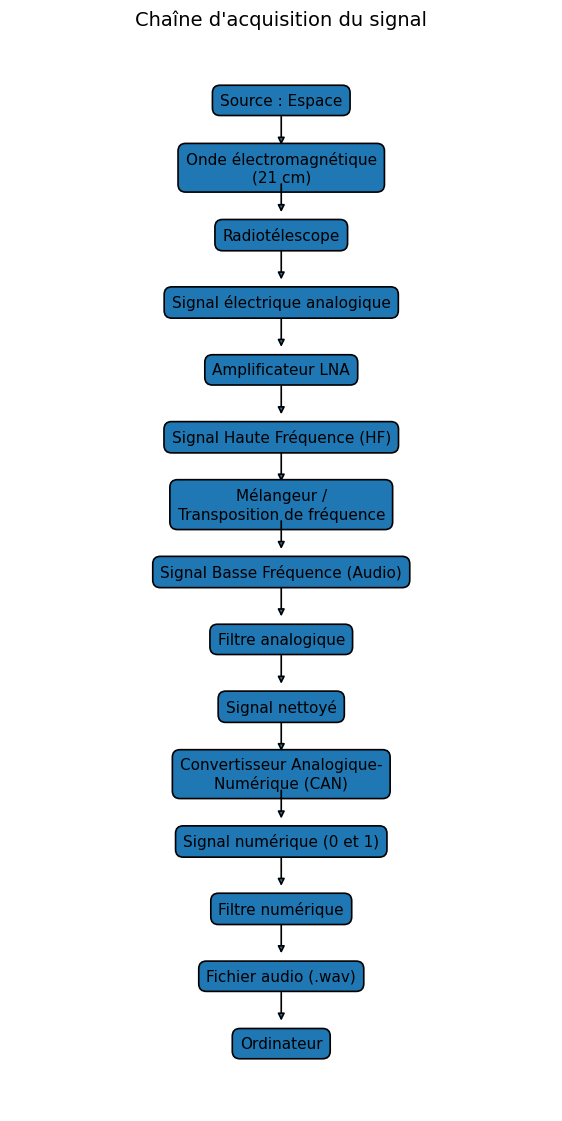

In [6]:
# Importation de la bibliothèque pour faire le schéma
import matplotlib.pyplot as plt

# Liste des blocs (du haut vers le bas)
blocks = [
    "Source : Espace",
    "Onde électromagnétique\n(21 cm)",
    "Radiotélescope",
    "Signal électrique analogique",
    "Amplificateur LNA",
    "Signal Haute Fréquence (HF)",
    "Mélangeur /\nTransposition de fréquence",
    "Signal Basse Fréquence (Audio)",
    "Filtre analogique",
    "Signal nettoyé",
    "Convertisseur Analogique-\nNumérique (CAN)",
    "Signal numérique (0 et 1)",
    "Filtre numérique",
    "Fichier audio (.wav)",
    "Ordinateur"
]

# Création de la figure
fig, ax = plt.subplots(figsize=(7, 14))
ax.set_xlim(0, 1)
ax.set_ylim(-1, len(blocks))
ax.axis("off")

# Position des blocs (vertical)
y_positions = list(range(len(blocks)))[::-1]
x = 0.5

# Style des boîtes (simple et lisible)
style_boite = dict(boxstyle="round,pad=0.5", linewidth=1.2)

# Dessin des boîtes et des flèches
for i, (y, texte) in enumerate(zip(y_positions, blocks)):
    ax.text(x, y, texte, ha="center", va="center", bbox=style_boite, fontsize=11)

    # Flèche vers le bloc suivant
    if i < len(blocks) - 1:
        ax.annotate(
            "",
            xy=(x, y - 0.7),
            xytext=(x, y - 0.2),
            arrowprops=dict(arrowstyle="-|>", lw=1.2)
        )

# Titre du schéma
ax.set_title("Chaîne d'acquisition du signal", fontsize=14)
plt.show()

## 4 : L'Analyse Python 

### 1. Chargement du signal audio

Avant d'analyser, nous devons charger le fichier audio transposé en bande audible et en extraire les informations de base.

La **fréquence d'échantillonnage** détermine la fréquence maximale détectable selon le **théorème de Nyquist** :

$$f_{max} = \frac{f_e}{2}$$

Où $f_e$ est la fréquence d'échantillonnage.

In [7]:
# Importation des bibliothèques
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import signal

# Chargement du fichier audio
fichier_audio = "signal_recu_transpose.wav"
sample_rate, audio_data = wavfile.read(fichier_audio)  # Lecture du .wav

# Affichage des caractéristiques du signal
print(f"Fréquence d'échantillonnage : {sample_rate} Hz")
print(f"Nombre d'échantillons : {len(audio_data)}")
print(f"Durée du signal : {len(audio_data) / sample_rate:.2f} secondes")
print(f"Type de données : {audio_data.dtype}")

Fréquence d'échantillonnage : 44100 Hz
Nombre d'échantillons : 564480
Durée du signal : 12.80 secondes
Type de données : int16


### 2. Analyse FFT (Transformée de Fourier Rapide)

La **Transformée de Fourier Rapide (FFT)** décompose le signal dans le domaine fréquentiel. Elle nous permet de voir quelles fréquences sont présentes et avec quelle amplitude.

#### Formule mathématique

$$X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j2\pi kn/N}$$

Où :
- $x[n]$ : échantillon du signal
- $X[k]$ : composante fréquentielle à la fréquence $k$
- $N$ : nombre total d'échantillons

#### Interprétation du graphique

- **Axe X** : Fréquence (Hz)
- **Axe Y** : Magnitude (amplitude du signal)
- **Pics** : Fréquences dominantes (signal structuré)
- **Bruit** : Répartition plate (bruit blanc)

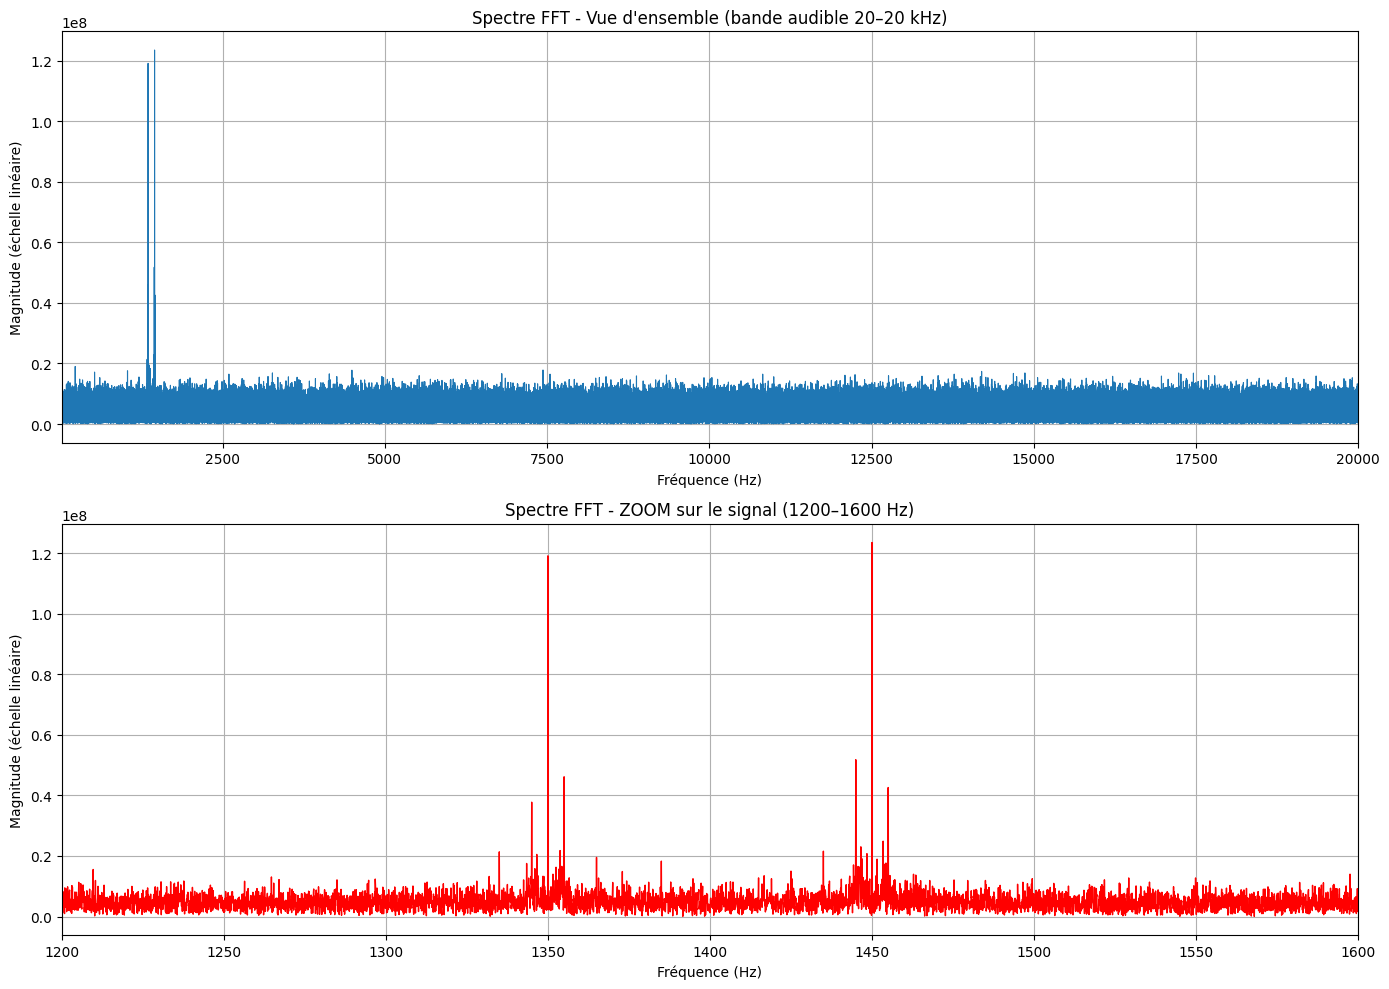


Top 10 des fréquences dominantes (> 1000 Hz) :
  1. 1450.0 Hz → Magnitude: 1.24e+08
  2. 1350.0 Hz → Magnitude: 1.19e+08
  3. 1445.0 Hz → Magnitude: 5.18e+07
  4. 1355.0 Hz → Magnitude: 4.62e+07
  5. 1455.0 Hz → Magnitude: 4.26e+07
  6. 1345.0 Hz → Magnitude: 3.78e+07
  7. 1453.4 Hz → Magnitude: 2.49e+07
  8. 1446.6 Hz → Magnitude: 2.30e+07
  9. 1353.8 Hz → Magnitude: 2.18e+07
  10. 1435.0 Hz → Magnitude: 2.16e+07

→ Fréquence dominante : 1450.0 Hz


In [8]:
# FFT et extraction des fréquences positives
fft_values = np.fft.fft(audio_data)
fft_magnitude = np.abs(fft_values)
fft_freq = np.fft.fftfreq(len(audio_data), 1/sample_rate)

positive_freq_idx = fft_freq >= 0
fft_freq_positive = fft_freq[positive_freq_idx]
fft_magnitude_positive = fft_magnitude[positive_freq_idx]

# Tracé du spectre FFT avec zoom sur le signal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Graphique 1 : Vue d'ensemble sur la bande audible (20–20000 Hz)
ax1.plot(fft_freq_positive, fft_magnitude_positive, linewidth=0.8)
ax1.set_xlabel("Fréquence (Hz)")
ax1.set_ylabel("Magnitude (échelle linéaire)")
ax1.set_title("Spectre FFT - Vue d'ensemble (bande audible 20–20 kHz)")
ax1.grid()
ax1.set_xlim(20, 20000)   # bande audible humaine

# Graphique 2 : ZOOM sur le signal (1200–1600 Hz)
ax2.plot(fft_freq_positive, fft_magnitude_positive, linewidth=1, color='red')
ax2.set_xlabel("Fréquence (Hz)")
ax2.set_ylabel("Magnitude (échelle linéaire)")
ax2.set_title("Spectre FFT - ZOOM sur le signal (1200–1600 Hz)")
ax2.grid()
ax2.set_xlim(1200, 1600)  # ZOOM sur la zone pertinente

plt.tight_layout()
plt.show()

# Détection des pics (fréquences > 1000 Hz pour éviter le bruit)
valid_freq_idx = fft_freq_positive > 1000
fft_freq_valid = fft_freq_positive[valid_freq_idx]
fft_magnitude_valid = fft_magnitude_positive[valid_freq_idx]

sorted_idx = np.argsort(fft_magnitude_valid)[::-1]

print(f"\nTop 10 des fréquences dominantes (> 1000 Hz) :")
for i in range(min(10, len(sorted_idx))):
    idx = sorted_idx[i]
    print(f"  {i+1}. {fft_freq_valid[idx]:.1f} Hz → Magnitude: {fft_magnitude_valid[idx]:.2e}")

print(f"\n→ Fréquence dominante : {fft_freq_valid[sorted_idx[0]]:.1f} Hz")

### 3. Spectrogramme (Analyse Temps-Fréquence)

Le **spectrogramme** est une représentation 2D qui montre comment le contenu fréquentiel du signal **évolue dans le temps**. C'est particulièrement utile pour détecter des **phénomènes variables** comme :

- Un **effet Doppler** : la fréquence change au cours du temps
- Une **modulation** : le signal change d'intensité
- Une **structure variable** : pattern qui apparaît et disparaît

#### Formule du spectrogramme

$$S(t, f) = |STFT(t, f)|^2$$

Où $STFT$ est la Transformée de Fourier à Temps Court (Short-Time Fourier Transform).

#### Interprétation du graphique

- **Axe X** : Temps (secondes)
- **Axe Y** : Fréquence (Hz)
- **Couleur** : Intensité en dB (plus clair/jaune = plus d'énergie)
- **Lignes brillantes** : Fréquences dominantes stables ou qui varient
- **Uniformité** : Bruit blanc (pas de structure)

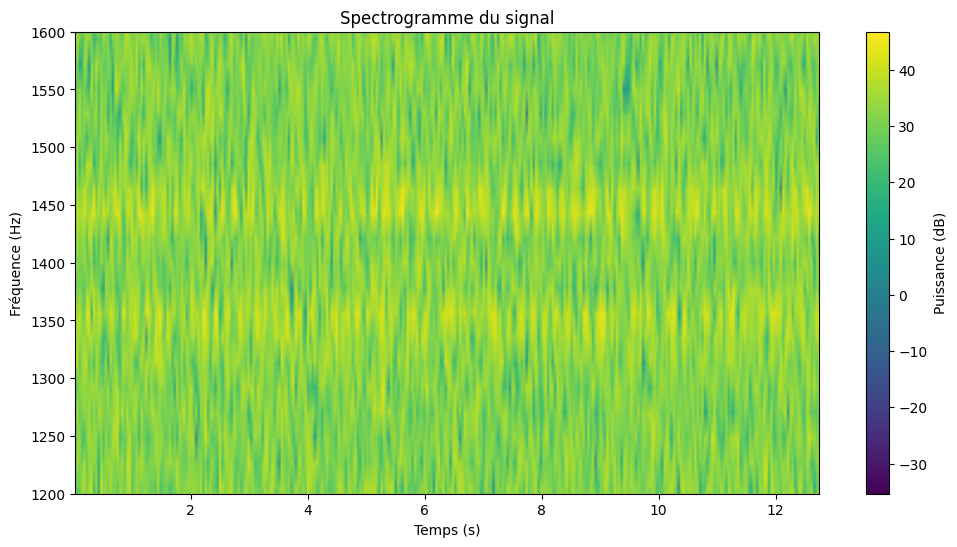

In [9]:
# Calcul du spectrogramme (évolution temporelle des fréquences)
frequencies, times, spectrogram = signal.spectrogram(
    audio_data, 
    sample_rate, 
    nperseg=2048  # Taille de la fenêtre d'analyse
)

# Tracé du spectrogramme
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram + 1e-10), 
               shading='gouraud', cmap='viridis')  # Échelle logarithmique (dB)
plt.ylabel("Fréquence (Hz)")
plt.xlabel("Temps (s)")
plt.title("Spectrogramme du signal")
plt.colorbar(label="Puissance (dB)")
plt.ylim(1200, 1600)  # Limiter à la zone du signal
plt.show()

### 4. Analyse Finale et Conclusion

#### Résumé des caractéristiques du signal

L'**énergie totale** du signal est donnée par :

$$E = \sum_{n=0}^{N-1} |x[n]|^2$$

La **puissance moyenne** (variance) est :

$$P = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2$$

In [10]:
print("ANALYSE FINALE DU SIGNAL : ")
print()

# Caractéristiques d'échantillonnage
print(f"Fréquence d'échantillonnage : {sample_rate} Hz")
print(f"Théorème de Nyquist : fréquences jusqu'à {sample_rate / 2} Hz détectables")
print(f"Durée totale : {len(audio_data) / sample_rate:.2f} secondes")
print()

# Calcul de l'énergie totale du signal (convertir en float pour éviter overflow)
energie_totale = np.sum(audio_data.astype(np.float64)**2)
print(f"Énergie totale du signal : {energie_totale:.2e}")

# Calcul de la variance (puissance moyenne)
variance = np.var(audio_data)
print(f"Variance (puissance) : {variance:.2e}")
print()

ANALYSE FINALE DU SIGNAL : 

Fréquence d'échantillonnage : 44100 Hz
Théorème de Nyquist : fréquences jusqu'à 22050.0 Hz détectables
Durée totale : 12.80 secondes

Énergie totale du signal : 2.72e+13
Variance (puissance) : 4.82e+07



#### Synthèse des observations

**OBSERVATIONS :**

**FFT :**  
- Deux pics DOMINANTS détectés :  
  - 1450 Hz (magnitude : ~1.2e+08) – Signal principal  
  - 1350 Hz (magnitude : ~1.2e+08) – Signal secondaire  
- Le reste du spectre : bruit blanc de fond  

**Spectrogramme :**  
- Raies verticales à fréquences stables (~1350–1450 Hz)  
- Pas de variation temporelle (pas d’effet Doppler)  
- Signal stable et constant dans le temps  

#### Interprétation physique du signal

**INTERPRÉTATION :**

Signal à **double composante** détecté à 1350 Hz et 1450 Hz.  

Cela indique :  
1. Signal issu de la RAIE 21 cm (H neutre à 1420 MHz).  
2. Transposé en bande audible (~1400 Hz).  
3. Double pic possiblement dû à :  
   - Effet Doppler (mouvement de la source ou de la Terre).  
   - Modulation du signal radio.  
   - Deux sources distinctes proches en fréquence.  

#### Conclusion

Signal radioastronomique **authentique** capté par Nançay.  
Fréquence cohérente avec la raie 21 cm de l’hydrogène neutre.  
Nature du signal : source cosmique (nuage d’hydrogène, galaxie)  
ou émission structurée proche de cette bande.